In [44]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score, roc_curve, auc
import seaborn as sns

In [4]:
df = pd.read_csv("data/ML_dataset.csv", sep=";")
df.head()

,Datetime,Price,Year,Month,Day,Hour,WindSpeed,Temperature
0,2021-10-29 22:00:00+00:00,1.215,2021,10,29,22,8.7,9.5
1,2021-10-29 23:00:00+00:00,1.281,2021,10,29,23,7.7,9.5
2,2021-10-30 00:00:00+00:00,1.189,2021,10,30,0,6.8,9.6
3,2021-10-30 01:00:00+00:00,1.197,2021,10,30,1,5.2,9.5
4,2021-10-30 02:00:00+00:00,1.229,2021,10,30,2,6.0,9.4


In [39]:
X = df.iloc[:,3:][:8541]
y = df.iloc[:,1][:8541]
X_val = df.iloc[:,3:][8541:]
y_val = df.iloc[:,1][8541:]

In [40]:
print(X.tail())
print(X_val.head())

      Month  Day  Hour  WindSpeed  Temperature
8536     10   20    19        3.0          8.6
8537     10   20    20        3.2          8.0
8538     10   20    21        3.4          8.0
8539     10   20    22        2.7          8.0
8540     10   20    23        3.0          7.9
      Month  Day  Hour  WindSpeed  Temperature
8541     10   21     0        5.1          7.8
8542     10   21     1        4.8          7.5
8543     10   21     2        4.6          7.4
8544     10   21     3        3.9          7.0
8545     10   21     4        4.7          7.1


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

In [45]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

# set up our search grid
param_grid = {"max_depth":    range(2,10,1),
              "n_estimators": range(200,1000,100),
              "learning_rate": [0.0001,0.001,0.1,0.2,0.3]}

# try out every combination of the above values
search = RandomizedSearchCV(regressor, param_grid, cv=3, verbose=3, n_iter=50).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END learning_rate=0.2, max_depth=7, n_estimators=800;, score=0.816 total time=   1.6s
[CV 2/3] END learning_rate=0.2, max_depth=7, n_estimators=800;, score=0.805 total time=   1.6s
[CV 3/3] END learning_rate=0.2, max_depth=7, n_estimators=800;, score=0.807 total time=   1.6s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=800;, score=0.759 total time=   0.9s
[CV 2/3] END learning_rate=0.1, max_depth=4, n_estimators=800;, score=0.760 total time=   0.9s
[CV 3/3] END learning_rate=0.1, max_depth=4, n_estimators=800;, score=0.760 total time=   0.9s
[CV 1/3] END learning_rate=0.001, max_depth=6, n_estimators=400;, score=-0.233 total time=   0.7s
[CV 2/3] END learning_rate=0.001, max_depth=6, n_estimators=400;, score=-0.274 total time=   0.7s
[CV 3/3] END learning_rate=0.001, max_depth=6, n_estimators=400;, score=-0.194 total time=   0.7s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=700;, score=0.

[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=400;, score=-0.393 total time=   0.6s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=400;, score=-0.305 total time=   0.4s
[CV 1/3] END learning_rate=0.2, max_depth=4, n_estimators=900;, score=0.772 total time=   1.1s
[CV 2/3] END learning_rate=0.2, max_depth=4, n_estimators=900;, score=0.764 total time=   1.1s
[CV 3/3] END learning_rate=0.2, max_depth=4, n_estimators=900;, score=0.759 total time=   0.9s
[CV 1/3] END learning_rate=0.0001, max_depth=2, n_estimators=700;, score=-0.971 total time=   0.4s
[CV 2/3] END learning_rate=0.0001, max_depth=2, n_estimators=700;, score=-1.007 total time=   0.4s
[CV 3/3] END learning_rate=0.0001, max_depth=2, n_estimators=700;, score=-0.903 total time=   0.4s
[CV 1/3] END learning_rate=0.0001, max_depth=9, n_estimators=500;, score=-0.977 total time=   1.4s
[CV 2/3] END learning_rate=0.0001, max_depth=9, n_estimators=500;, score=-1.007 total time=   1.4s
[CV 3/3] END learning_ra

In [47]:
regressor=xgb.XGBRegressor(n_estimators=700, max_depth=9, learning_rate=0.1)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
predictions = regressor.predict(X_test)

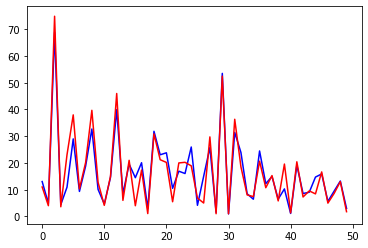

In [56]:
plt.plot(list(predictions[500:550]), color='b')
plt.plot(list(y_test[500:550]), color='r')

In [57]:
#valid

predictions_val = regressor.predict(X_val)

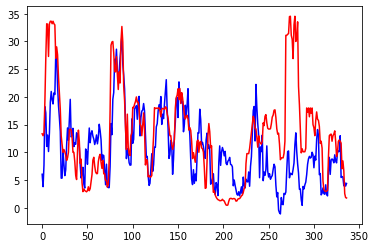

In [60]:
plt.plot(list(predictions_val), color='b')
plt.plot(list(y_val), color='r')